# Метод главных компонент

### Алгоритм PCA

Дана матрица данных $D$ и коэффициент $\alpha$:
1. вычисляем среднее значение $\mu = \frac{1}{n} \sum \limits_{i=1}^{n} x_i$;
2. центруем матрицу данных $Z = D - 1 \cdot \mu^T$;
3. вычисляем матрицу ковариаций $K = \frac{1}{n} (Z^T Z)$;
4. вычисляем собственные значения $(\lambda_1, \lambda_2, \ldots, \lambda_d)$;
5. вычисляем собственные векторы $U = (u_1 u_2 \ldots u_d)$;
6. вычисляем долю общей дисперсии $f(r) = \frac{\sum_{i=1}^{r} \lambda_i} {\sum_{i=1}^{n} \lambda_i}$;
7. выбираем наименьший $r$ так, чтобы $f(r) \geq \alpha$;
8. выбираем $r$ первых векторов $U = (u_1 u_2 \ldots u_r)$;
9. уменьшаем признаковое пространство: $A = \{ a_i \: | \: a_i = U_r^T x_i, \: для \: i = 1, \ldots, n \} $

Реализуйте алгоритм для первых двух главных компонент. Найдите $\lambda_1$, $\lambda_2$ и $u_1$, $u_2$. Спроецируйте данные на плоскость образуемую этими векторами, визуализируйте полученные результаты c метками классов. Сравните реузльтаты с методом PCA из библиотеки sklearn.decomposition.

В качестве данных возьмите изображения с рукописными цифрами.

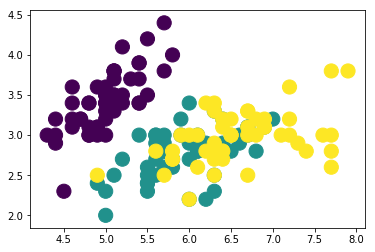

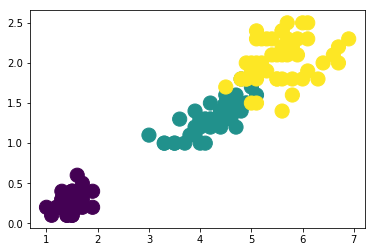

In [58]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
%matplotlib inline

data = load_iris()
x, y = data['data'], data['target']
plt.scatter(x[:,0], x[:,1], s = 200, c = y)
plt.show()
plt.scatter(x[:,2], x[:,3], s = 200, c = y)

На основе полученных собственных значений ковариационной матриы $K$ постройте график зависимости покрываемой дисперсии трансформированных данных от количества главных компонент.

# Интерпретация компонент
## Корреляция с исходными признаками
Главные компоненты являются линейными кобинациями исходных признаков. В этой связи необходимо оценить связь каждой компоненты с исходными признаками.

Рассчет взаимосвязи будем проводить с помощью корреляции Пирсона:

\begin{equation}
r_{jk} = \frac{\sum_{i=1}^n (x_{ij} - \bar{x}_j) (x_{ik}' - \bar{x}_k')}{\sqrt{\sum_{i=1}^n (x_{ij} - \bar{x}_j)^2 \sum_{i=1}^n (x_{ik}' - \bar{x}_k')^2}}
\end{equation}

где
$\bar{x}_j$ - среднее значение $j$-го признака,
$\bar{x}_k'$ - среднее значение проекции на $k$-ю главную компоненту,
$n$ - количество объектов.

Отметим, что корреляция Пирсона изменяется от $-1$ до $+1$. Она равна $0$ в случае, когда величины независимы, и $\pm 1$, если они линейно зависимы.

Определите по коэффициентам корреляции, какие признаки в какую компоненту вошли.

In [3]:
M = []
for i in range(0, 4):
    M.append(x[:,i].mean())
M = np.array(M)
M


array([5.84333333, 3.05733333, 3.758     , 1.19933333])

In [4]:
Z = np.zeros((150, 4))
for i in range(len(x)):
    for j in range(4):
        Z[i][j] = x[i][j] - M[j]
print(Z)

[[-7.43333333e-01  4.42666667e-01 -2.35800000e+00 -9.99333333e-01]
 [-9.43333333e-01 -5.73333333e-02 -2.35800000e+00 -9.99333333e-01]
 [-1.14333333e+00  1.42666667e-01 -2.45800000e+00 -9.99333333e-01]
 [-1.24333333e+00  4.26666667e-02 -2.25800000e+00 -9.99333333e-01]
 [-8.43333333e-01  5.42666667e-01 -2.35800000e+00 -9.99333333e-01]
 [-4.43333333e-01  8.42666667e-01 -2.05800000e+00 -7.99333333e-01]
 [-1.24333333e+00  3.42666667e-01 -2.35800000e+00 -8.99333333e-01]
 [-8.43333333e-01  3.42666667e-01 -2.25800000e+00 -9.99333333e-01]
 [-1.44333333e+00 -1.57333333e-01 -2.35800000e+00 -9.99333333e-01]
 [-9.43333333e-01  4.26666667e-02 -2.25800000e+00 -1.09933333e+00]
 [-4.43333333e-01  6.42666667e-01 -2.25800000e+00 -9.99333333e-01]
 [-1.04333333e+00  3.42666667e-01 -2.15800000e+00 -9.99333333e-01]
 [-1.04333333e+00 -5.73333333e-02 -2.35800000e+00 -1.09933333e+00]
 [-1.54333333e+00 -5.73333333e-02 -2.65800000e+00 -1.09933333e+00]
 [-4.33333333e-02  9.42666667e-01 -2.55800000e+00 -9.99333333e

In [5]:
K = np.dot(Z.T,Z)/len(Z)
K

array([[ 0.68112222, -0.04215111,  1.26582   ,  0.51282889],
       [-0.04215111,  0.18871289, -0.32745867, -0.12082844],
       [ 1.26582   , -0.32745867,  3.09550267,  1.286972  ],
       [ 0.51282889, -0.12082844,  1.286972  ,  0.57713289]])

In [6]:
l = np.linalg.eig(K)
l

(array([4.20005343, 0.24105294, 0.0776881 , 0.02367619]),
 array([[ 0.36138659, -0.65658877, -0.58202985,  0.31548719],
        [-0.08452251, -0.73016143,  0.59791083, -0.3197231 ],
        [ 0.85667061,  0.17337266,  0.07623608, -0.47983899],
        [ 0.3582892 ,  0.07548102,  0.54583143,  0.75365743]]))

In [45]:
r =2
sum(l[0][i] for i in range(r))/sum(l[0][j] for j in range(len(K)))

0.9776852063187949

In [46]:
U = l[1][:,0:r]
U

array([[ 0.36138659, -0.65658877],
       [-0.08452251, -0.73016143],
       [ 0.85667061,  0.17337266],
       [ 0.3582892 ,  0.07548102]])

In [47]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
XPCAreduced = pca.fit_transform(x)
explained_variance = np.var(XPCAreduced, axis=0)
explained_variance_ratio = explained_variance / np.sum(explained_variance)
print(pca.explained_variance_ratio_)

[0.92461872 0.05306648]


[4.22824171 0.24267075]


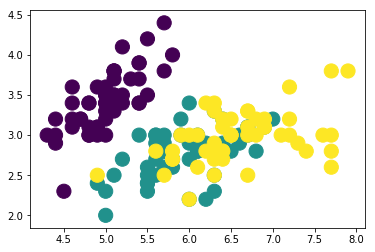

In [48]:
print(pca.explained_variance_)
plt.scatter(x[:,0], x[:,1], s = 200, c = y)

In [62]:
res = np.dot(U.T, Z.T)
print(res)
len(res)

[[-2.68412563 -2.71414169 -2.88899057 -2.74534286 -2.72871654 -2.28085963
  -2.82053775 -2.62614497 -2.88638273 -2.6727558  -2.50694709 -2.61275523
  -2.78610927 -3.22380374 -2.64475039 -2.38603903 -2.62352788 -2.64829671
  -2.19982032 -2.5879864  -2.31025622 -2.54370523 -3.21593942 -2.30273318
  -2.35575405 -2.50666891 -2.46882007 -2.56231991 -2.63953472 -2.63198939
  -2.58739848 -2.4099325  -2.64886233 -2.59873675 -2.63692688 -2.86624165
  -2.62523805 -2.80068412 -2.98050204 -2.59000631 -2.77010243 -2.84936871
  -2.99740655 -2.40561449 -2.20948924 -2.71445143 -2.53814826 -2.83946217
  -2.54308575 -2.70335978  1.28482569  0.93248853  1.46430232  0.18331772
   1.08810326  0.64166908  1.09506066 -0.74912267  1.04413183 -0.0087454
  -0.50784088  0.51169856  0.26497651  0.98493451 -0.17392537  0.92786078
   0.66028376  0.23610499  0.94473373  0.04522698  1.11628318  0.35788842
   1.29818388  0.92172892  0.71485333  0.90017437  1.33202444  1.55780216
   0.81329065 -0.30558378 -0.06812649 -

2

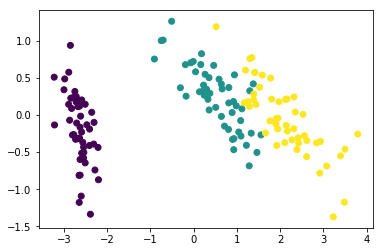

In [63]:
plt.scatter(res[0].tolist(),res[1].tolist(),c=y)

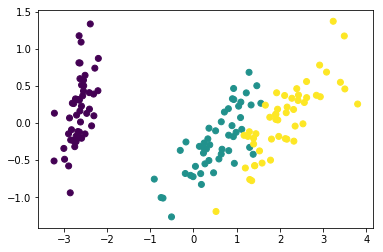

In [65]:
plt.scatter(XPCAreduced[:,0],XPCAreduced[:,1], c=y)

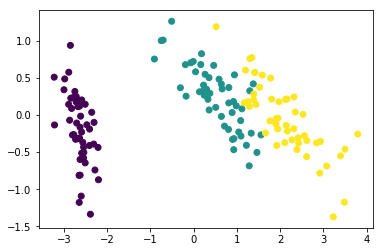

In [67]:
#в алгоритме и sklearn берется вектор противоположный нашему и график выходит перевернутый,перевернем :) 
plt.scatter(XPCAreduced[:,0],XPCAreduced[:,1]*-1, c=y)